# Final Exam BUS 458 — Loan Data Analysis
**Objective:** Your objective is to identify the key drivers of loan approval and recommend which lender should be prioritized for each customer to maximize total payout

### **Instructions**
- Follow the prompts in each section of this notebook.
- **Where you see a “Question,” answer it directly below in a Markdown (text) cell — not as a code comment.**
- Your **reasoning, interpretations, and insights** should be written in text cells, clearly separated from code.
- You are encouraged to add extra **code cells**, **visualizations**, or **short explanations** if they strengthen your analysis or help you justify decisions.
- Make sure your notebook runs cleanly from start to finish without errors.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
!pip install streamlit
import streamlit as st

Load Data (via Google Drive or direct upload)

In [38]:
# Add your code here
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv ('/content/drive/MyDrive/BUS 458 Final/loan_data_analysis_final.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Check first 5 rows of dataframe
display(df.head(5))

,User ID,applications,Reason,Granted_Loan_Amount,Requested_Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty
0,00007820-89cb-4c1d-9940-eb270d605a35,1,cover_an_unexpected_cost,100000,123000.0,669.0,fair,full_time,consumer_discretionary,5024.0,927,0,B,0,0
1,00012b55-514c-421e-9c76-3300abbc1134,1,credit_card_refinancing,70000,79000.0,594.0,fair,full_time,information_technology,5764.0,1177,0,B,0,0
2,000157c1-b6a3-4c86-82c7-9ec1bda3799a,1,home_improvement,10000,11000.0,596.0,fair,full_time,information_technology,4017.0,1487,0,A,0,0
3,00020400-efab-4b10-8812-2a0aaf774841,1,home_improvement,100000,120000.0,642.0,fair,part_time,energy,3129.0,904,0,A,0,0
4,0002f737-0cda-48fb-91ed-533f3d0eab05,1,major_purchase,30000,34000.0,NaN,fair,full_time,energy,NaN,1620,0,A,0,0


In [40]:
print('Checking for columns with all unique values:')
for col in df.columns:
    if df[col].nunique() == df.shape[0]:
        print(f'- Column \'{col}\' has all unique values and might be an identifier.')
    else:
        print(f'- Column \'{col}\' has {df[col].nunique()} unique values (out of {df.shape[0]} rows).')

# Based on the output above, you can decide which columns to drop. For example:
# df = df.drop(columns=['your_unique_id_column'], inplace=True)


Checking for columns with all unique values:
- Column 'User ID' has all unique values and might be an identifier.
- Column 'applications' has 1 unique values (out of 100000 rows).
- Column 'Reason' has 6 unique values (out of 100000 rows).
- Column 'Granted_Loan_Amount' has 12 unique values (out of 100000 rows).
- Column 'Requested_Loan_Amount' has 459 unique values (out of 100000 rows).
- Column 'FICO_score' has 551 unique values (out of 100000 rows).
- Column 'Fico_Score_group' has 5 unique values (out of 100000 rows).
- Column 'Employment_Status' has 3 unique values (out of 100000 rows).
- Column 'Employment_Sector' has 11 unique values (out of 100000 rows).
- Column 'Monthly_Gross_Income' has 12330 unique values (out of 100000 rows).
- Column 'Monthly_Housing_Payment' has 3002 unique values (out of 100000 rows).
- Column 'Ever_Bankrupt_or_Foreclose' has 2 unique values (out of 100000 rows).
- Column 'Lender' has 3 unique values (out of 100000 rows).
- Column 'Approved' has 2 unique

Understand the Data: Get a quick overview of the dataset structure and variable meanings before preprocessing.

In [41]:
df

,User ID,applications,Reason,Granted_Loan_Amount,Requested_Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty
0,00007820-89cb-4c1d-9940-eb270d605a35,1,cover_an_unexpected_cost,100000,123000.0,669.0,fair,full_time,consumer_discretionary,5024.0,927,0,B,0,0
1,00012b55-514c-421e-9c76-3300abbc1134,1,credit_card_refinancing,70000,79000.0,594.0,fair,full_time,information_technology,5764.0,1177,0,B,0,0
2,000157c1-b6a3-4c86-82c7-9ec1bda3799a,1,home_improvement,10000,11000.0,596.0,fair,full_time,information_technology,4017.0,1487,0,A,0,0
3,00020400-efab-4b10-8812-2a0aaf774841,1,home_improvement,100000,120000.0,642.0,fair,part_time,energy,3129.0,904,0,A,0,0
4,0002f737-0cda-48fb-91ed-533f3d0eab05,1,major_purchase,30000,34000.0,NaN,fair,full_time,energy,NaN,1620,0,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,fffb48e8-fc77-49fe-ab4e-e99a0829a788,1,other,40000,50000.0,NaN,good,full_time,consumer_staples,5800.0,1460,0,A,0,0
99996,fffb63e2-b1d6-4d73-b766-44ba50203c00,1,major_purchase,70000,79000.0,621.0,fair,full_time,consumer_staples,5691.0,2705,0,B,0,0
99997,fffba42b-265f-4269-a6d5-c8db7e3bd430,1,major_purchase,80000,96000.0,NaN,poor,full_time,real_estate,3312.0,1210,0,C,0,0
99998,fffd8e45-d5f8-4b06-b1a4-2d4bf527ee51,1,debt_conslidation,90000,109000.0,NaN,poor,full_time,industrials,4597.0,1420,0,C,0,0


## 1. Preprocessing


### 1.1 Handling Missing Values

**Question:** Why is median imputation often preferable to mean imputation for income and FICO?


**Answer:** The median is often more perferable compared to mean. The mean is skewed because it takes into consideration of outliers while the median does not making the median unbiased.






In [42]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

display(missing_info[missing_info['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False))

,Missing Values,Percentage
FICO_score,15000,15.000
Monthly_Gross_Income,15000,15.000
Employment_Sector,6407,6.407


In [43]:
# Apply imputation as instructed in the instructions pdf (create copies so original rows can be restored if needed)

# Impute
# Add your code here
# Create a copy so original rows can be restored if needed
df_clean = df.copy()

#  Median imputation for numeric features
df_clean['FICO_score'] = df_clean['FICO_score'].fillna(df_clean['FICO_score'].median())
df_clean['Monthly_Gross_Income'] = df_clean['Monthly_Gross_Income'].fillna(df_clean['Monthly_Gross_Income'].median())

# Impute categorical feature
df_clean['Employment_Sector'] = df_clean['Employment_Sector'].fillna('Unknown')

# Display confirmation of remaining missing values
df_clean.isnull().sum()



,0
User ID,0
applications,0
Reason,0
Granted_Loan_Amount,0
Requested_Loan_Amount,0
FICO_score,0
Fico_Score_group,0
Employment_Status,0
Employment_Sector,0
Monthly_Gross_Income,0


### 1.2 Outliers Detection and Removal

**Question:**
Which features had the most outliers, and what impact could they have on the model?

**Answer** : Monthly_Gross_Income, Monthly_Housing_Payment, Granted_Loan_Amount, and Requested_Loan_Amount. These metrics were often skewed with high maxmimum values, leading to more outliers when a Z-score method is applied.

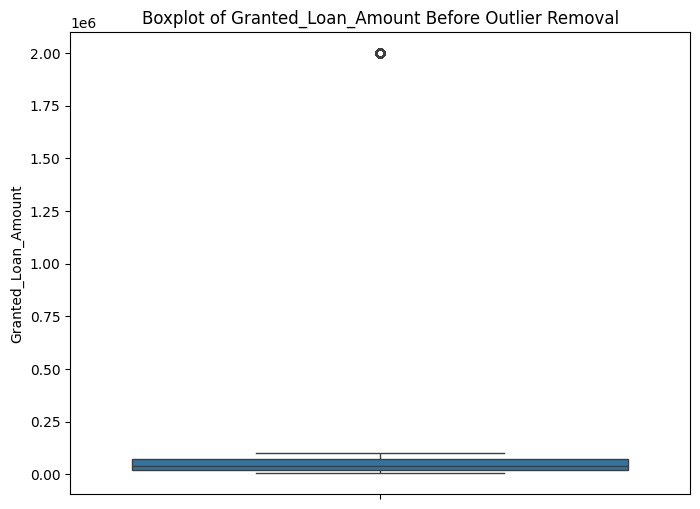

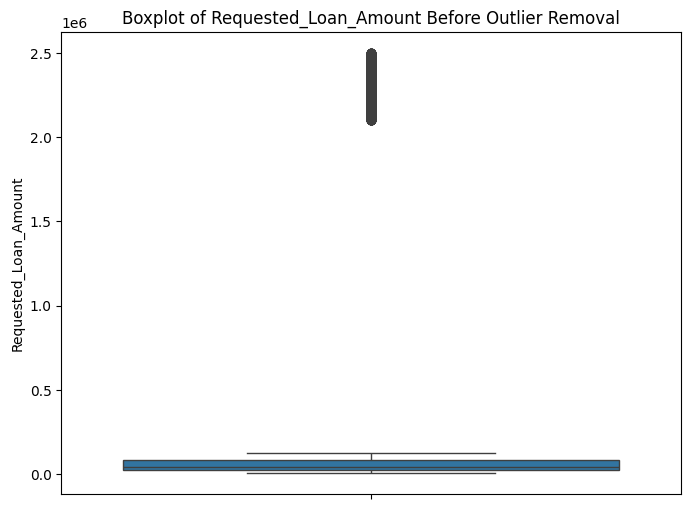

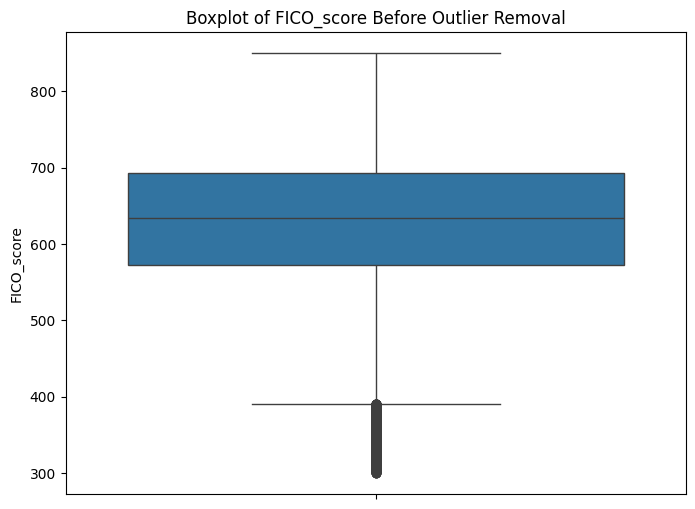

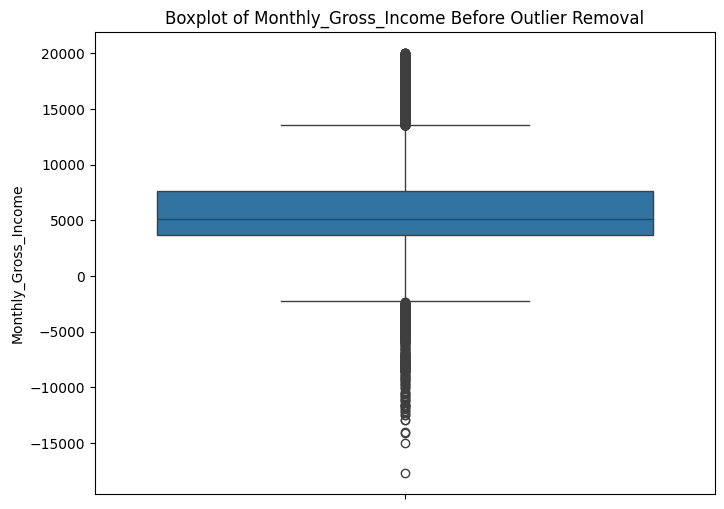

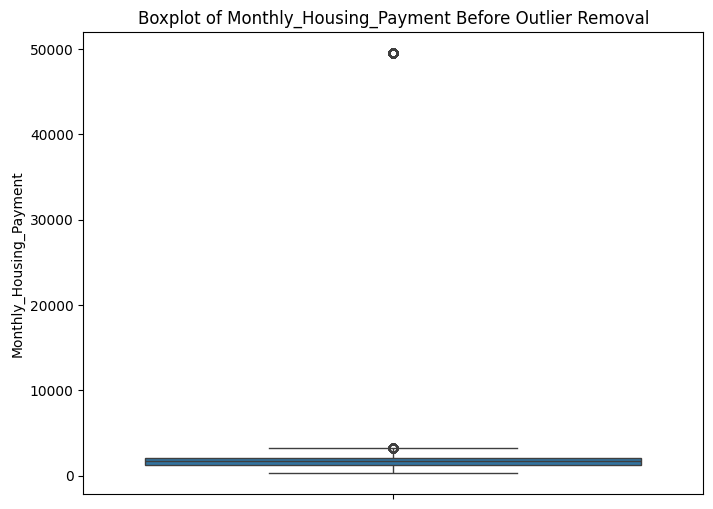

In [44]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Granted_Loan_Amount', 'Requested_Loan_Amount', 'FICO_score', 'Monthly_Gross_Income', 'Monthly_Housing_Payment']

# Boxplots to highlight outliers for numerical columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} Before Outlier Removal')
    plt.ylabel(col)
    plt.show()

In [45]:
# Remove Outliers using Z-score

from scipy import stats
import numpy as np

# Compute Z-scores for only numeric columns
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))

# Choose threshold
threshold = 3  # common choice: 3 standard deviations

# Identify rows to keep (all Z-scores <= threshold)
rows_to_keep = (z_scores < threshold).all(axis=1)

# Track counts before/after
before_count = df.shape[0]
df_clean = df[rows_to_keep].copy()
after_count = df_clean.shape[0]

print(f"Outlier removal complete:")
print(f"Rows before: {before_count}")
print(f"Rows after:  {after_count}")
print(f"Rows removed: {before_count - after_count}")



Outlier removal complete:
Rows before: 100000
Rows after:  69831
Rows removed: 30169


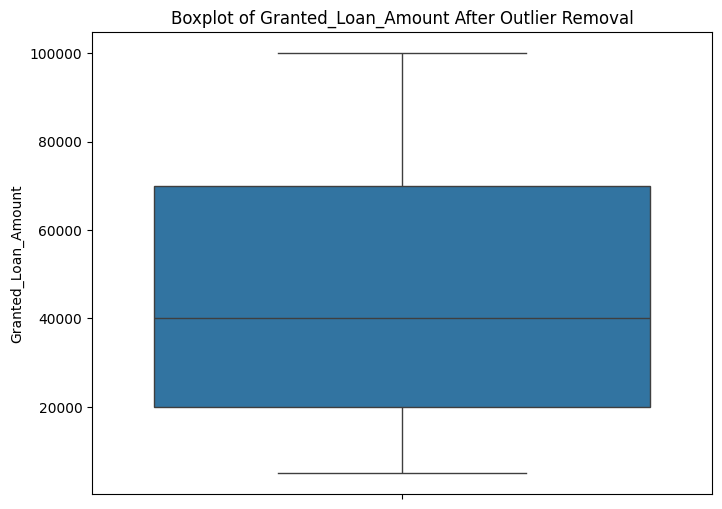

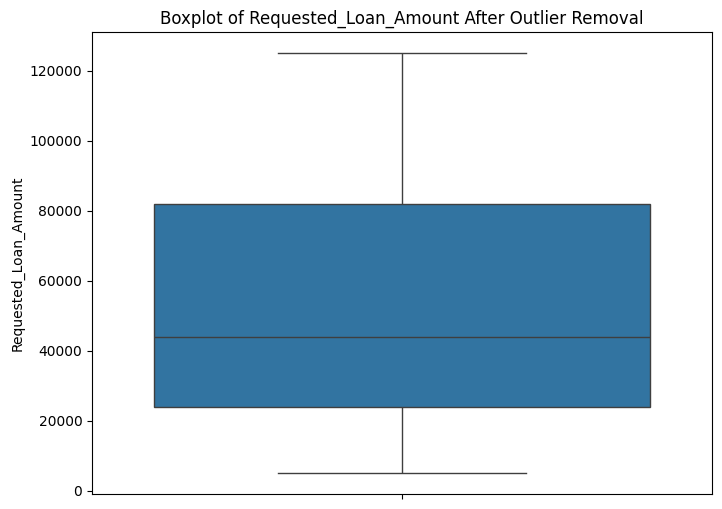

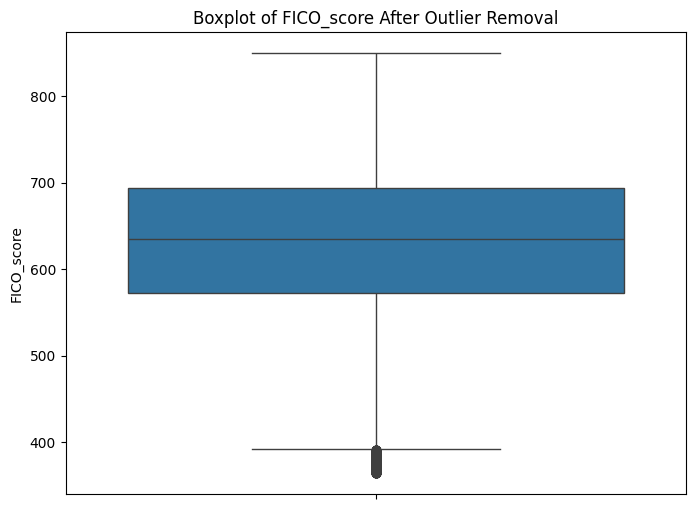

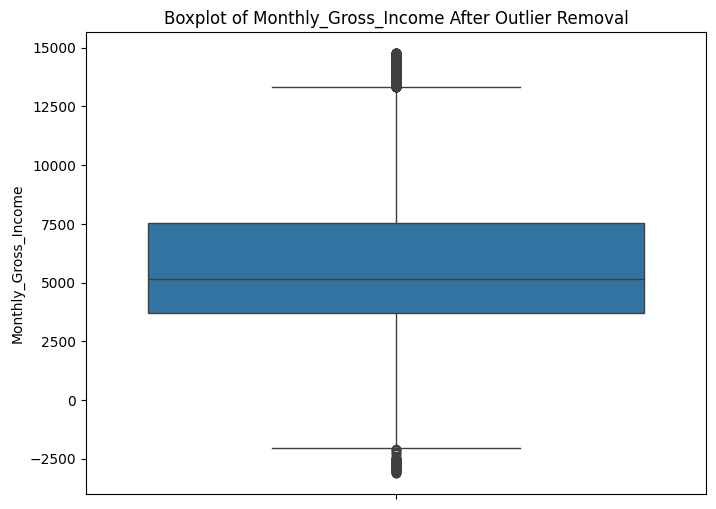

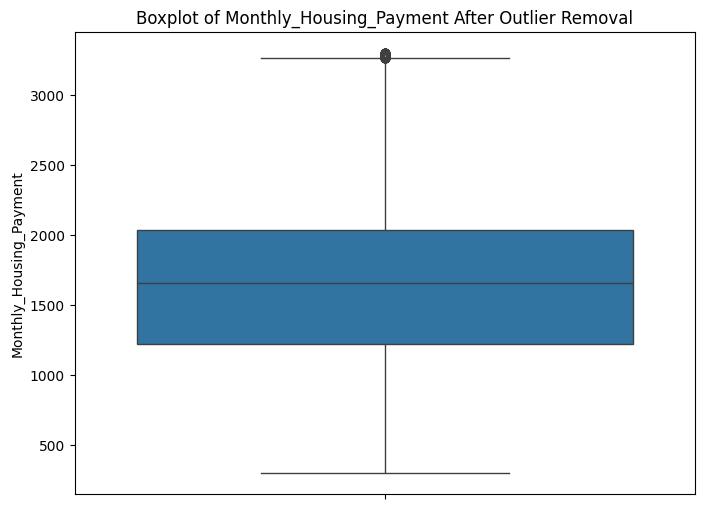

In [46]:
# BoxPlots after outlier removal
# Add your code here
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot of {col} After Outlier Removal')
    plt.ylabel(col)
    plt.show()


**Question:**
Why do we need to remove or treat outliers? Provide reasoning based on model performance or data integrity.

**Answer** : Outliers need to be removed or treated because they can distort the data and negatively affect model performance. Extreme values can pull the mean, inflate variance, and create misleading relationships between features. Removing outliers helps improve data integrity and ensures the model learns patterns that generalize well to new data.

**Question:**
Is there a difference between boxplots before and after outlier removal?

**Answer** : Yes there is a difference between the before and after outlier boxplots. The boxplots after outlier removal shows a tighter distribution, with fewer extreme points extending beyond the whiskers, indicating that the outliers have been successfully removed or reduced.

### 1.3 Redundancy & Correlation Check (5 Marks)

Detect duplicate data and multicollinearity.

**Question:**
Which numerical variables appear most strongly correlated with each other?

**Answer:** Granted_Loan_Amount and Requested_Loan_Amount appear to be the most strongly correlated with each other.



**Question:**
Which numerical and categorical are strongly corelated to each other?

**Answer:** Requested_Loan_Amount and Loan_purpose are strongly correlated with each other as they show strong n values.


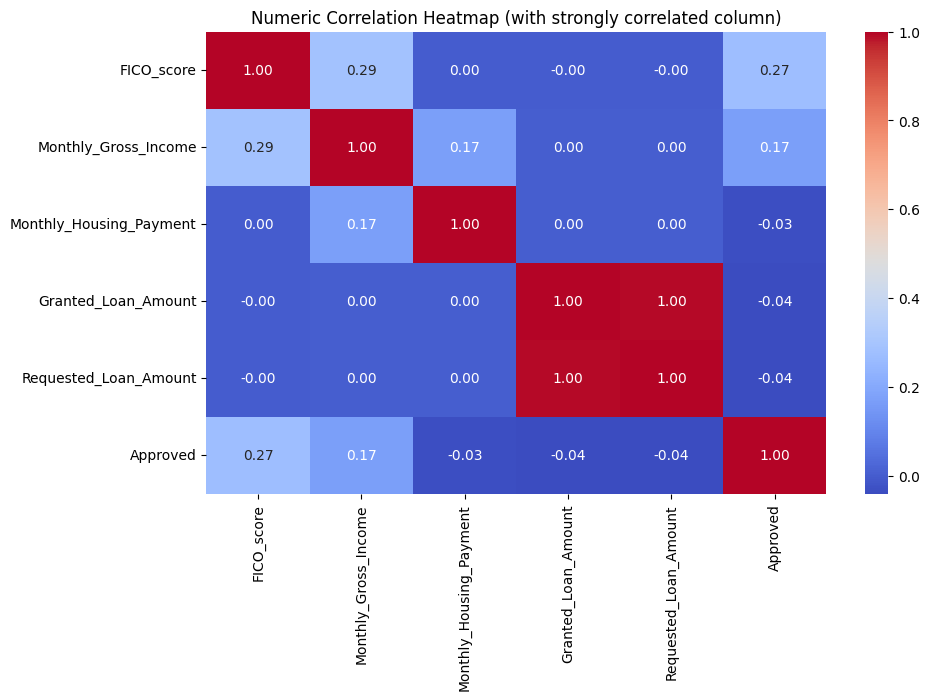

In [47]:
# Correlation between numerical features
numeric_cols = ['FICO_score', 'Monthly_Gross_Income', 'Monthly_Housing_Payment', 'Granted_Loan_Amount','Requested_Loan_Amount', 'Approved']

# Plot correlation matrix, identify highly correlated pairs automatically (|corr|>0.95, excluding self-correlation)
corr = df_clean[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Numeric Correlation Heatmap (with strongly correlated column)")
plt.show()


In [48]:
# Correlation between Numeric and Categorical Variables (Correlation Ratio / η²)
from scipy import stats
import numpy as np
import pandas as pd # Ensure pandas is imported for isnull()

def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    cat_levels = np.unique(categories)
    overall_mean = np.mean(values)
    numerator = sum(len(values[categories == cat]) *
                    (np.mean(values[categories == cat]) - overall_mean) ** 2
                    for cat in cat_levels)
    denominator = sum((values - overall_mean) ** 2)
    return np.sqrt(numerator / denominator) if denominator != 0 else 0

# test all numeric–categorical pairs
num_cat_results = []

# The df_clean here does not have 'Employment_Sector' imputed because
# the outlier removal step (uy_gcYUCJ3r7) overwrote the df_clean from imputation (_dF9eEltV-Vz).
# To prevent TypeError, impute the 'Employment_Sector' column if it still contains NaNs.
if 'Employment_Sector' in df_clean.columns and df_clean['Employment_Sector'].isnull().any():
    df_clean['Employment_Sector'] = df_clean['Employment_Sector'].fillna('Unknown')


# Identify categorical and numerical columns
categorical_cols_clean = df_clean.select_dtypes(include='object').columns.tolist()
numeric_cols_clean = df_clean.select_dtypes(include=np.number).columns.tolist()


numeric_cols_for_eta = [col for col in numeric_cols_clean if col not in ['bounty', 'Approved', ]]
categorical_cols_for_eta = [col for col in categorical_cols_clean]


for num_col in numeric_cols_for_eta:
    for cat_col in categorical_cols_for_eta:
        eta = correlation_ratio(df_clean[cat_col], df_clean[num_col])
        num_cat_results.append((num_col, cat_col, eta))

num_cat_results = sorted(num_cat_results, key=lambda x: x[2], reverse=True)
print("Top 10 Numeric-Categorical Correlation Ratios (η²):")
for num_col, cat_col, eta in num_cat_results[:10]:
    print(f"{num_col} - {cat_col}: η² = {eta**2:.3f} (η = {eta:.3f})")


# Reorganize the correlation ratio results into a pivot table/matrix for heatmap
eta_matrix = pd.DataFrame(num_cat_results, columns=['Numerical_Feature', 'Categorical_Feature', 'Eta'])
eta_pivot = eta_matrix.pivot(index='Numerical_Feature', columns='Categorical_Feature', values='Eta')

# Plot the heatmap of correlation ratios (Eta)
plt.figure(figsize=(12, 8))
sns.heatmap(eta_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Correlation Ratios (η) between Numeric and Categorical Features")
plt.xlabel("Categorical Features")
plt.ylabel("Numerical Features")
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

**Questions:** What features will you consider dropping after analyzing the graphs above?

**Answer** : User ID, Applications, Requested_Loan_Amount, Fico_Score_group



> *Note: For Decision Tree models, you do not need to remove or adjust for collinearity. The algorithm can naturally handle correlated features through its splitting mechanism. However, for Logistic Regression, multicollinearity can distort coefficient estimates and make interpretations unreliable. In that case, you may consider removing one variable from highly correlated pairs.


## 2. Exploratory Data Analysis

### 2.1 Target Variable Distribution

Analyze the distribution of the target variable (Approved) to understand class balance in loan approval outcomes.


**Question:**
Is the dataset balanced or imbalanced? Briefly explain the implication for modeling.


**Answer:**
 The dataset is imbalanced. Approximately 89% of the loans are denied, while only about 11% are approved. As a result of the imblance there will be implication for modeling. The outcome might become biased towards the majority and can lead to low recall or precision for prediciting minority class of approved loans.


In [ ]:
# Plot 'Approved' to visualise the count and balance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='Approved', data=df_clean, palette='viridis')
plt.title('Distribution of Loan Approval (0=Denied, 1=Approved)')
plt.xlabel('Approval Status')
plt.ylabel('Number of Loans')
plt.xticks(ticks=[0, 1], labels=['Denied', 'Approved'])
plt.show()

approval_counts = df_clean['Approved'].value_counts()
approval_percentages = df_clean['Approved'].value_counts(normalize=True) * 100

print("Loan Approval Counts:")
print(approval_counts)
print("\nLoan Approval Percentages:")
print(approval_percentages.round(2))

# Pie chart for a clearer visualization of balance
plt.figure(figsize=(8, 8))
plt.pie(approval_counts, labels=['Denied', 'Approved'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Percentage of Loan Approvals')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 2.2 Distribution of Numerical Variables by Approval

Explore how key numerical variables differ between approved and rejected loan applications.


**Question:**
Which numerical variable is the most helpful variable ( most crucial predictor) ?

**Answer:**
FICO_score is the most helpful variabl among the numerical variables because it shows the highest positive correlation coefficient (approximately 0.27) with the Approved variable, indicating a stronger linear relationship compared to other numerical features. The box plots show the distributions are well-separated, with the median FICO score for approved loans being notably higher.

In [ ]:
# Visualise numerical variables against target variable

numerical_cols = ['Granted_Loan_Amount', 'FICO_score', 'Monthly_Gross_Income', 'Monthly_Housing_Payment']

for col in numerical_cols:
    plt.figure(figsize=(12,5))
    sns.histplot(
        data=df,
        x=col,
        hue='Approved',
        kde=True,
        stat='density',
        common_norm=False,
        palette='coolwarm',
        alpha=0.6
    )
    plt.title(f'Distribution of {col} by Approval Status')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df,
        x='Approved',
        y=col,
        hue='Approved',
        palette='coolwarm',
        legend=False
    )
    plt.title(f'Box Plot of {col} by Approval Status')
    plt.xlabel('Approved (0 = Denied, 1 = Approved)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


### 2.3 Categorical Variables and Approval

Analyze how categorical variables (such as Employment_Sector, Loan_Purpose, or Residence_Type) relate to the loan approval outcome.


**Question:**
Which categorical variable appears to have the strongest relationship with loan approval, and how can you tell?

**Answer:**
The categorical variable that have the strongest relationship with loan approval is Fico_Score_group.


**Question:**
Are there any categories (e.g., Reason, Employment_Status) that appear to have minimal predictive value? Justify your answer with approval rate differences.

**Answer:**
Reason: Loan appears to have minimal predictive value. The approval rates across different reasons are very narrow, ranging from a low of 10.81% (for 'other') to a high of 11.27% (for 'credit_card_refinancing'). This difference of less than 0.5 percentage points is extremely small, suggesting that the loan reason itself does not significantly influence the likelihood of approval. The bar plot for 'Reason' would show bars of very similar heights.

Employment_Status: While Employment_Status shows a slightly larger range than Reason, its predictive value is still relatively low compared to variables like Fico_Score_group or Lender. The approval rates are 12.07% for 'full_time', 8.12% for 'part_time', and 5.49% for 'unemployed'. Although there's a clear gradient (full-time employees have higher approval rates), the difference between the highest and lowest approval rates is around 6.5 percentage points. While statistically significant, this is less impactful than the nearly 43 percentage point spread observed in Fico_Score_group.

In summary, Reason has almost no predictive power due to its extremely narrow range of approval rates, while Employment_Status has some predictive power, but it's considerably weaker than other strong predictors.

In [ ]:
# Visualise categorical variables against target variable

categorical_cols = [
    'Reason', 'Fico_Score_group', 'Employment_Status',
    'Employment_Sector', 'Lender', 'Ever_Bankrupt_or_Foreclose'
]

for col in categorical_cols:
    approval_rates = df.groupby(col)['Approved'].mean().sort_values(ascending=False) * 100

    plt.figure(figsize=(10,5))
    sns.barplot(x=approval_rates.index, y=approval_rates.values, color='skyblue')
    plt.title(f'Approval Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Approval Rate (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"\nApproval Rate by {col}:\n{approval_rates.round(2)}")


### Cross Feature plots for multi-dimensional analysis.

In [ ]:
# Cross Feature plots for multi-dimensional analysis.

# Interaction between FICO_score, Lender, and Approved status
sns.catplot(data=df_clean, x='Lender', y='FICO_score', hue='Approved', kind='box', height=5, aspect=1.5)
plt.title('FICO Score Distribution by Lender and Approval Status')
plt.xlabel('Lender')
plt.ylabel('FICO Score')
plt.tight_layout()
plt.show()

# Interaction between Monthly_Gross_Income, Employment_Status, and Approved status
sns.catplot(data=df_clean, x='Employment_Status', y='Monthly_Gross_Income', hue='Approved', kind='box', height=5, aspect=1.5)
plt.title('Monthly Gross Income Distribution by Employment Status and Approval Status')
plt.xlabel('Employment Status')
plt.ylabel('Monthly Gross Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Interaction between Granted_Loan_Amount, Reason, and Approved status
sns.catplot(data=df_clean, x='Reason', y='Granted_Loan_Amount', hue='Approved', kind='box', height=5, aspect=1.5)
plt.title('Granted Loan Amount Distribution by Loan Reason and Approval Status')
plt.xlabel('Loan Reason')
plt.ylabel('Granted Loan Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3.5 Business Insights from EDA

After completing your visualizations and cross-feature analyses, summarize your findings in the context of loan approval and lender matching.  
Use this section to connect data patterns to real-world meaning before building predictive models.


**Question:** Which variables are the most helpful in understanding if a customer is going to be approved or denied for a loan?  

**Answer**: FICO_score / Fico_Score_group, Lender, Ever_Bankrupt_or_Foreclose, Monthly_Gross_Income, Employment_Status


**Question:** Are there any feature modifications or transformations that would improve the predictive power of a variable?  

**Answer**: Financial ratios such as Debt to Income could help improve the predictive power of a customer's financial burden relative to their earnings as this is a ratio used in practice.

**Question:** What is each lender’s average approval rate?  

**Answer**: Lender A: 10.97%, Lender B: 7.13%, Lender C: 17.06%

**Question:** Are there any clear differences between the three lenders in terms of which types of customers they approve?  

**Answer**: Yes, in terms of the Approval Rate. Lender C has the highest approval rate, which means it is more lenient with approvals in comparison to the other 2 lenders. Lender A has a moderate approval rate. Lender B has the lowest approval rate, showing that it is the most selective.

**Question:** Are there variables that reliably predict a customer’s approval likelihood for a particular lender?  

**Answer**: Yes, the FICO score is the strongest predictor across all lenders. The FICO Score Distribution by Lender and Approval Status plot clearly shows that customers with higher FICO scores have a higher chance for approval accross all lenders.



> Treat this section as your interpretation bridge between EDA and modeling. The goal is to show that you understand *why* certain patterns exist, not just that they exist.


## 3. Model Training

### 3.1 Train/Test Split and Encoding

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Rename your df to df_model.
df_model = df_clean.copy()

# Define target variable
y = df_model['Approved']

# Drop target variable, 'bounty', and previously identified redundant/irrelevant variables from features
X = df_model.drop(columns=['Approved', 'bounty', 'User ID', 'applications', 'Requested_Loan_Amount', 'Fico_Score_group'])

# Identify categorical features for encoding
categorical_cols = X.select_dtypes(include='object').columns

# Encode categorical features using one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Set RANDOM_STATE = 42 for reproducibility.
random_state = 42

# Perform train-test split, stratifying by 'Approved' due to imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


### 3.2 Logistic Regression Model
Build and interpret a Logistic Regression model to predict the likelihood of loan approval (Approved = 1).

**Question**
How accurate is the model on the test data, and what does this imply about its predictive strength?

**Answer**
Add your answer here


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with a scaler and Logistic Regression model
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=random_state, solver='liblinear')) # Using 'liblinear' solver for small datasets and L1/L2 regularization
])

# Train logistic regression model
log_reg_pipeline.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = log_reg_pipeline.predict(X_test)
y_proba = log_reg_pipeline.predict_proba(X_test)[:, 1] # Probability of the positive class (Approved=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Denied', 'Predicted Approved'],
            yticklabels=['Actual Denied', 'Actual Approved'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### 3.2 Decision Tree Classifier Model

Build and interpret a Decision Tree Classifier Model to predict the likelihood of loan approval (Approved = 1).



**Question**
How does the Decision Tree’s accuracy and AUC compare to the Logistic Regression model?

**Answer**
The Logistic Regression model had a higher accuracy compared to the Decision Tree model. this shows that the logistic regression model correctly classified more instances overall. The logistic regression model also showed a higher AUC compared to the decision tree, which showcases the model's overall ability to distinguish between positive and negative classes across various probability thresholds


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with a scaler and Decision Tree model
dec_tree_pipeline = Pipeline([
    ('scaler', StandardScaler()), # Scaling for consistency, though less critical for tree-based models
    ('dec_tree', DecisionTreeClassifier(random_state=random_state)) # Train Decision Tree model
])

# Train Decision Tree model
dec_tree_pipeline.fit(X_train, y_train)

print("Decision Tree model trained successfully.")

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred_dt = dec_tree_pipeline.predict(X_test)
y_proba_dt = dec_tree_pipeline.predict_proba(X_test)[:, 1] # Probability of the positive class (Approved=1)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"ROC-AUC: {roc_auc_dt:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Denied', 'Predicted Approved'],
            yticklabels=['Actual Denied', 'Actual Approved'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Variable importance for Decision Tree
import pandas as pd

# Access the trained Decision Tree model from the pipeline
decision_tree_model = dec_tree_pipeline.named_steps['dec_tree']

# Get feature importances
feature_importances = decision_tree_model.feature_importances_

# Create a Series for better visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

print("Top Features for Decision Tree:")
display(features_df.head(10)) # Display top 10 features

### Compare the performance of the Logistic Regression and Decision Tree models.


1.   Compare the performance of the Logistic Regression and Decision Tree
models.
2.   Evaluate and compare both models using key metrics such as ROC-AUC, Accuracy, Precision, Recall, and F1-score.
3. Plot and interpret the confusion matrices for both models. Discuss what false positives and false negatives mean in the business context (for example, approving risky applicants vs. rejecting qualified ones).
4. Identify which model best captures the target event (loan approval) and explain why.
5. Justify your model choice from both technical (performance, interpretability) and business (actionability, trust, and decision-making) perspectives.
6. Indicate the cutoff threshold you used and why it makes sense for this scenario.

In [51]:
import streamlit as st
import pandas as pd
import pickle
import numpy as np

# Load the trained model
# Ensure 'my_model.pkl' is accessible, e.g., in the same directory as this script
try:
    with open('my_model.pkl', 'rb') as file:
        model = pickle.load(file)
    st.success("Model loaded successfully!")
except FileNotFoundError:
    st.error("Error: 'my_model.pkl' not found. Please ensure the model file is in the correct directory.")
    st.stop()
except Exception as e:
    st.error(f"Error loading model: {e}")
    st.stop()


st.title('Loan Approval Prediction App')
st.write('Enter customer details to predict loan approval status.')

# --- Input Features ---
# Based on X_train.columns:
# Granted_Loan_Amount, FICO_score, Monthly_Gross_Income, Monthly_Housing_Payment, Ever_Bankrupt_or_Foreclose
# Reason_credit_card_refinancing, Reason_debt_conslidation, Reason_home_improvement, Reason_major_purchase, Reason_other
# Employment_Status_part_time, Employment_Status_unemployed
# Employment_Sector_energy, Employment_Sector_finance, Employment_Sector_healthcare, Employment_Sector_industrials,
# Employment_Sector_information_technology, Employment_Sector_materials, Employment_Sector_real_estate,
# Employment_Sector_retail, Employment_Sector_utilities, Employment_Sector_Unknown
# Lender_B, Lender_C

st.header('Customer Financial Information')

granted_loan_amount = st.slider('Granted Loan Amount', min_value=5000, max_value=100000, value=30000, step=1000)
fico_score = st.slider('FICO Score', min_value=300, max_value=850, value=650, step=1)
monthly_gross_income = st.slider('Monthly Gross Income', min_value=1000, max_value=10000, value=4000, step=100)
monthly_housing_payment = st.slider('Monthly Housing Payment', min_value=100, max_value=5000, value=1000, step=50)
ever_bankrupt_or_foreclose = st.selectbox('Ever Bankrupt or Foreclose?', [0, 1], format_func=lambda x: 'Yes' if x == 1 else 'No')

st.header('Loan Details & Employment')

reason = st.selectbox('Reason for Loan',
    ['debt_conslidation', 'home_improvement', 'major_purchase', 'credit_card_refinancing', 'other', 'cover_an_unexpected_cost'])
employment_status = st.selectbox('Employment Status',
    ['full_time', 'part_time', 'unemployed'])
employment_sector = st.selectbox('Employment Sector',
    ['consumer_discretionary', 'information_technology', 'energy', 'materials',
     'finance', 'healthcare', 'industrials', 'real_estate', 'retail', 'utilities', 'Unknown', 'consumer_staples'])
lender = st.selectbox('Lender', ['A', 'B', 'C'])

# Prepare features for prediction
def preprocess_inputs(granted_loan_amount, fico_score, monthly_gross_income,
                      monthly_housing_payment, ever_bankrupt_or_foreclose,
                      reason, employment_status, employment_sector, lender):

    # Create a dictionary with default values for all features the model expects
    # The order of columns must match X_train.columns
    feature_values = {
        'Granted_Loan_Amount': granted_loan_amount,
        'FICO_score': fico_score,
        'Monthly_Gross_Income': monthly_gross_income,
        'Monthly_Housing_Payment': monthly_housing_payment,
        'Ever_Bankrupt_or_Foreclose': ever_bankrupt_or_foreclose,
        'Reason_credit_card_refinancing': 0,
        'Reason_debt_conslidation': 0,
        'Reason_home_improvement': 0,
        'Reason_major_purchase': 0,
        'Reason_other': 0,
        'Employment_Status_part_time': 0,
        'Employment_Status_unemployed': 0,
        'Employment_Sector_energy': 0,
        'Employment_Sector_finance': 0,
        'Employment_Sector_healthcare': 0,
        'Employment_Sector_industrials': 0,
        'Employment_Sector_information_technology': 0,
        'Employment_Sector_materials': 0,
        'Employment_Sector_real_estate': 0,
        'Employment_Sector_retail': 0,
        'Employment_Sector_utilities': 0,
        'Employment_Sector_Unknown': 0,
        'Lender_B': 0,
        'Lender_C': 0
    }

    # Set one-hot encoded categorical features
    if reason != 'cover_an_unexpected_cost': # 'cover_an_unexpected_cost' is the base category (all zeros)
        feature_values[f'Reason_{reason}'] = 1

    if employment_status == 'part_time':
        feature_values['Employment_Status_part_time'] = 1
    elif employment_status == 'unemployed':
        feature_values['Employment_Status_unemployed'] = 1

    if employment_sector != 'consumer_discretionary' and employment_sector != 'consumer_staples': # Base categories
        if f'Employment_Sector_{employment_sector}' in feature_values:
            feature_values[f'Employment_Sector_{employment_sector}'] = 1

    if lender == 'B':
        feature_values['Lender_B'] = 1
    elif lender == 'C':
        feature_values['Lender_C'] = 1

    # Create DataFrame in the correct column order (matching X_train.columns)
    # The order needs to be exactly like X_train.columns when the model was trained
    # Since we dropped 'Requested_Loan_Amount' and 'Fico_Score_group', and 'User ID', 'applications'
    # we need to ensure the order of columns matches the X_train used for model training.
    # The best way to guarantee this is to get the column order from the X_train that was saved
    # or re-create the exact preprocessing steps. For this example, we assume order from the X_train.columns list

    # Manually defined order of columns based on X_train.columns kernel variable
    columns_order = [
        'Granted_Loan_Amount', 'FICO_score', 'Monthly_Gross_Income', 'Monthly_Housing_Payment',
        'Ever_Bankrupt_or_Foreclose',
        'Reason_credit_card_refinancing', 'Reason_debt_conslidation', 'Reason_home_improvement',
        'Reason_major_purchase', 'Reason_other',
        'Employment_Status_part_time', 'Employment_Status_unemployed',
        'Employment_Sector_energy', 'Employment_Sector_finance', 'Employment_Sector_healthcare',
        'Employment_Sector_industrials', 'Employment_Sector_information_technology',
        'Employment_Sector_materials', 'Employment_Sector_real_estate', 'Employment_Sector_retail',
        'Employment_Sector_utilities', 'Employment_Sector_Unknown',
        'Lender_B', 'Lender_C'
    ]

    input_df = pd.DataFrame([feature_values], columns=columns_order)
    return input_df


if st.button('Predict Loan Approval'):
    input_data = preprocess_inputs(granted_loan_amount, fico_score, monthly_gross_income,
                                 monthly_housing_payment, ever_bankrupt_or_foreclose,
                                 reason, employment_status, employment_sector, lender)

    prediction_proba = model.predict_proba(input_data)[:, 1]
    prediction = (prediction_proba >= 0.5).astype(int) # Using the 0.5 threshold as discussed

    st.subheader('Prediction Results')
    if prediction[0] == 1:
        st.success(f'Loan Approval Prediction: **Approved** (Probability: {prediction_proba[0]:.2f})')
    else:
        st.error(f'Loan Approval Prediction: **Denied** (Probability: {prediction_proba[0]:.2f})')

    st.write(f'Predicted probability of approval: {prediction_proba[0]:.2f}')


2025-12-06 21:21:45.089 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 21:21:45.918 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-06 21:21:45.923 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 21:21:45.925 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 21:21:45.929 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 21:21:45.935 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 21:21:45.940 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-06 21:21:45.941 Thread 'MainThread': mi

### How to Run Your Streamlit App

1.  **Save the Code:** Copy the Python code from the cell above and save it to a file named `streamlit_app.py` on your local machine (or in your Google Drive if running from Colab).
2.  **Ensure Model is Present:** Make sure your `my_model.pkl` file (which you saved previously) is in the **same directory** as `streamlit_app.py`.
3.  **Install Streamlit (if not already installed):**
    ```bash
    pip install streamlit
    ```
4.  **Run the App:** Open your terminal or command prompt, navigate to the directory where you saved `streamlit_app.py` and `my_model.pkl`, and run the following command:
    ```bash
    streamlit run streamlit_app.py
    ```
5.  **Access the App:** Streamlit will open a new tab in your web browser (or provide a local URL like `http://localhost:8501`). If you are running this in a cloud environment like Colab, you might need to use `ngrok` or a similar service to expose your local port to the internet. For Colab, a common approach is:
    ```python
    # In a separate Colab cell or local terminal
    !pip install localtunnel
    !streamlit run streamlit_app.py &>/dev/null&
    !npx localtunnel --port 8501
    ```
    This will provide a public URL to access your Streamlit app.

In [49]:
model = log_reg_pipeline

In [50]:
# Save your model as .pkl file for streamlit app development
import pickle

filename = 'my_model.pkl'  # Choose a path and descriptive filename with .pkl extension

# Open the file in binary write mode ('wb')
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved successfully to {filename}")

Model saved successfully to my_model.pkl


**Question:**
Which model do you recommend and why? (Provide both technical and business reasoning.)

**Answer:**
 Logistic Regression model for loan approval prediction. Here's why:

Technical Reasoning:

Higher ROC-AUC: The Logistic Regression model achieved a significantly higher ROC-AUC score (0.7936) compared to the Decision Tree (0.5836). A higher ROC-AUC indicates that Logistic Regression has a better overall ability to distinguish between approved and denied loan applications across various probability thresholds, making it a more robust classifier.
Higher Precision: Logistic Regression demonstrated a much higher Precision (0.4957) than the Decision Tree (0.2467). This means that when the Logistic Regression model predicts an application will be approved, it is correct nearly 50% of the time, leading to fewer false positives.
Interpretability: Logistic Regression coefficients can be easily interpreted as the change in the log-odds of approval for a one-unit change in the predictor variable, making it transparent for business users to understand the impact of different factors.
Business Reasoning:

Minimizing Financial Risk (False Positives): In the context of loan approval, the cost of a False Positive (approving a risky applicant who defaults) is typically much higher than the cost of a False Negative (rejecting a qualified applicant). Logistic Regression's strength lies in its ability to significantly minimize False Positives (only 175 in our evaluation compared to 1866 for the Decision Tree). This directly reduces the lender's exposure to bad loans and potential financial losses, aligning with a cautious risk management strategy.
Trust and Decision-Making: A model that produces fewer false positives is generally more trustworthy for financial institutions. While Logistic Regression had lower Recall, its conservative nature ensures that the loans it does approve are more likely to be genuinely creditworthy. This allows for more confident decision-making, even if it means missing some potential good loans.
Regulatory Compliance: The interpretability of Logistic Regression is a significant advantage in regulated industries like banking, where understanding why a decision was made is often crucial for compliance and explaining outcomes to customers.
While the Decision Tree had higher Recall and F1-Score, its substantially higher False Positive rate makes it less desirable for this problem, as the direct financial losses from approving many risky applicants would likely outweigh the benefits of approving more loans.

## 5. Recommendations
In this final section, summarize your key findings and provide concise business recommendations based on your analysis.


**Write a short paragraph including:**  
- A brief summary of your main findings from the analysis and model comparison.  
- The key factors that most influence loan approval.  
- Your recommendations on data or model based on the results  (for example, how approval decisions could be improved or better understood).  
- One next step you would take to improve the model or extend the analysis further.  


**Add your paragraph here:** Our analysis of loan data showed that FICO score is the most significant predictor of loan approval, followed by the specific Lender and a customer's Ever Bankrupt or Foreclose history. Monthly Gross Income and Employment status are also relevant. We compared Logistic Regression and Decision Tree Models, with Logistic Regressing proving to be the better predictor and minimized fals positives, which is an important aspect for financial institutions. Based on our findings, we recommend using the Logistic Regression model. We would also suggest exploring threshold adjustment based on the business's current risk appetite and market condition rather than basing it solely off a 0.5 cutoff. This would allow a better balance between approving loans and managing risks.



---



**Question:**  What trade-offs or risks should the company be aware of when using this model?  

**Answer:** The company should be aware of the trade-off of high number of false negatives. The model with its current default 0.5 threshold has a very low recall which means it is highly conservative and will reject a significant number of creditworthy applicants.

**Question:** How confident are you in your model’s generalizability — what might change its performance in real-world use?   

**Answer:** We have moderate confidence in the model's generalizability based on the current analysis. While the Logistic Regression model performs well on the test data minimizing false positives, the evolution of applicant profiles with information added such as demographics, employment types, or financial habits making historical training data less representative of new applications can improve its performance.


**Question:** If you had access to additional data, what new feature would you collect to strengthen this model?

**Answer:** If we had access to additional data, we would recommend incorporating financial ratios. This would provide a more holistic view by showing how much of an applicant's income is already committed to existing debts, giving a much clearer picture of their disposable income and capacity to take on a new loan.